# Problem statement

Implementation of linear regression using advertising dataset

In [1]:
# load the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the data
data = pd.read_csv('Advertising.csv')

In [5]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Domain Analysis

1. The data speaks about the amount spent on adversiting in various sector

2. Radio, TV and Newspaper are the 3 sectors/ domain 

3. target is sales, where we are trying to predict the sales done after been advertised

# Basic checks

In [3]:
#shape
data.shape

(200, 5)

In [4]:
#'Unnamed: 0 is giving no significance for predicting the target, we are going to drop it
data.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
data.shape

(200, 4)

In [6]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

Exploratory Data Analysis

1. Univarite analysis
      
         - analyse the single attribute /single column
         - here all the columns are numeric data
         - if it is a numerical col, we are going to basically check the distribution of data
         - HISTOGRAM

<Axes: ylabel='Density'>

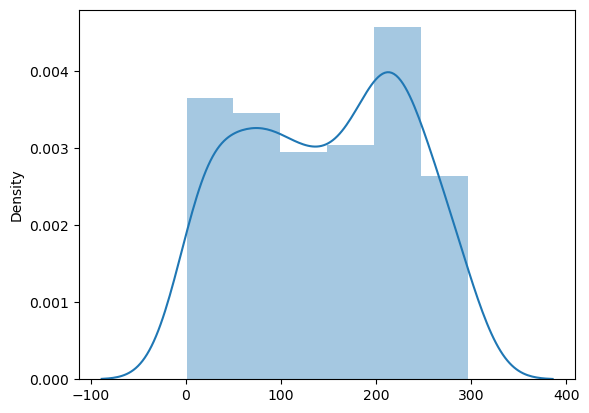

In [13]:
sns.distplot(x=data['TV'])

Insight : the distribution is not normal

In [19]:
#like wise you need to do it for rest of the columns and write the insight as above

<Axes: ylabel='Density'>

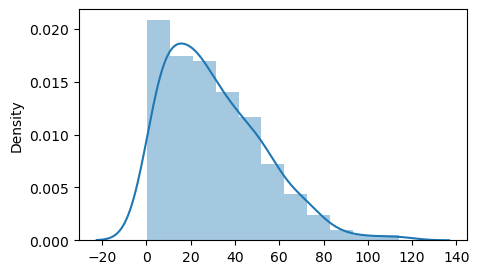

In [16]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Newspaper'])

<Axes: ylabel='Density'>

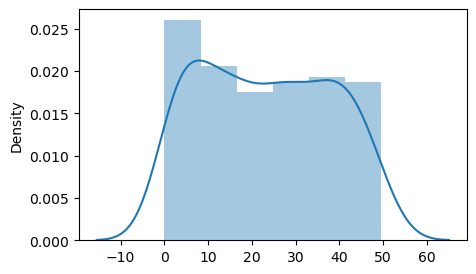

In [17]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Radio'])

<Axes: ylabel='Density'>

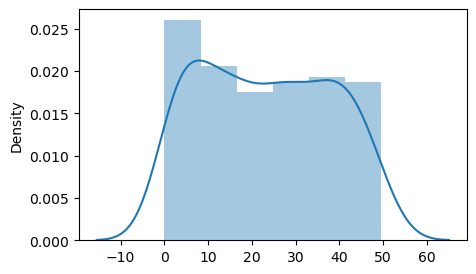

In [18]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Radio'])

Bivariate analysis

Two attributes

1. num vs num

2. num vs cat

3. always analyse the input vs target and write the insight (tip)

<Axes: xlabel='TV', ylabel='Sales'>

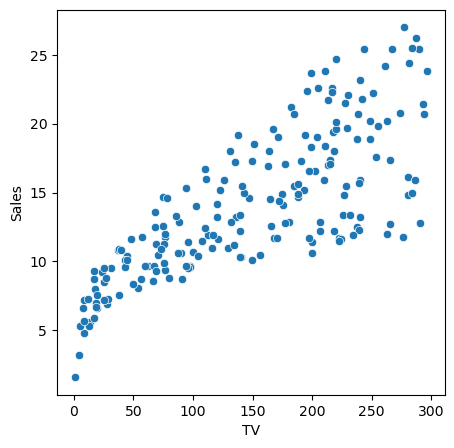

In [19]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x='TV', y = 'Sales')

Insight : as the amount spent on TV advertising is increasing the sales is also getting a raise

In [26]:
# follow the same for radio and newspaper

Multi variate analysis



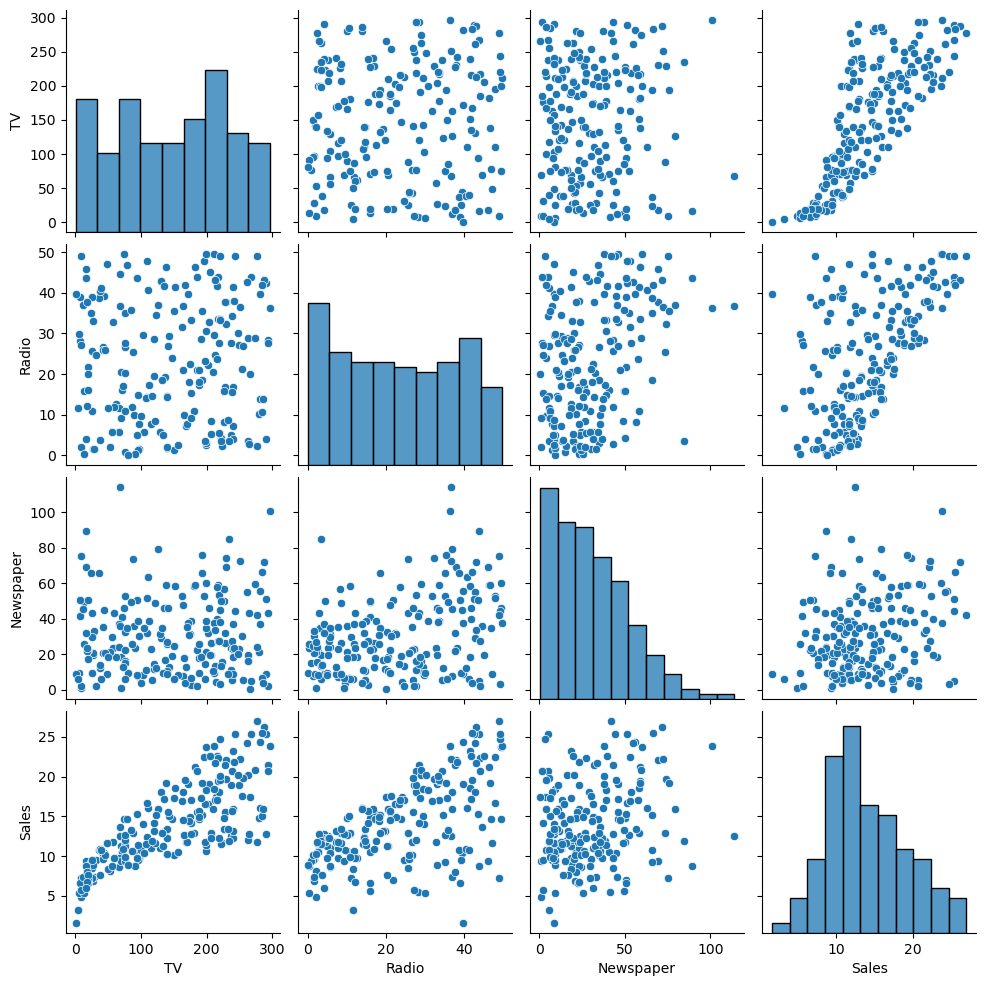

In [20]:
#pair plot
sns.pairplot(data)

# Preprocessing of data

Cleaning the data

We need to clean and bring the data to proper format, and then push the data for traning

In [21]:
#checking for null values, if the data is having null then replace with mean, median and mode
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [22]:
#checking for duplicates, if present drop them , data.drop_duplicates()
data.duplicated().sum()

0

<Axes: xlabel='Newspaper'>

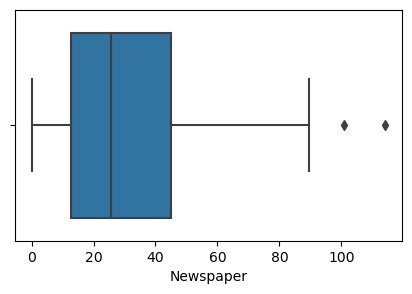

In [25]:
#outlier detection
plt.figure(figsize=(5,3))
sns.boxplot(x=data['Newspaper'])

<Axes: ylabel='Density'>

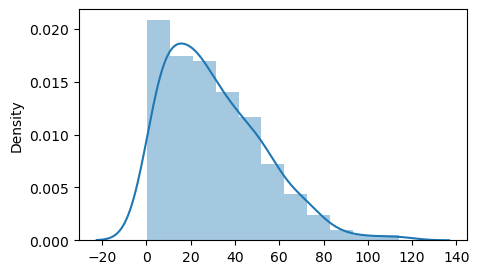

In [26]:
#we will handle the outliers, 
#1. distrubtion 

plt.figure(figsize=(5,3))
sns.distplot(x=data['Newspaper'])

In [33]:
#the distribution is not normal, skewed distribution
# We will handle the outlier by IQR method
# Q1, Q3
# IQR
# LOWER 
# UPPER

In [27]:
q1 = data['Newspaper'].quantile(0.25)
q1

12.75

In [28]:
q3 = data['Newspaper'].quantile(0.75)
q3

45.1

In [29]:
iqr = q3 - q1
iqr

32.35

In [30]:
lower = q1 - 1.5*iqr
lower

-35.775000000000006

In [31]:
upper = q3 + 1.5* iqr
upper

93.625

In [32]:
data.loc[data['Newspaper']<lower]

,TV,Radio,Newspaper,Sales


In [33]:
data.loc[data['Newspaper']>upper]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [34]:
#% of outlier 
# if % of outlier is 5 or below 5 then only handle 
# if % of outlier is > than 5 10,20 dont do anything
(len(data.loc[data['Newspaper']>upper])/len(data))*100

1.0

In [35]:
data['Newspaper'].median()

25.75

In [37]:
data.loc[data['Newspaper']>upper,'Newspaper'] = data['Newspaper'].median()

# Feature engineering / Feature selection

We are going to select the important features from the data, for the model to get trained


1. drop the irrelevant columns

2. heatmap and check the co relation values

In [43]:
#drop the irrelevant columns 

<Axes: >

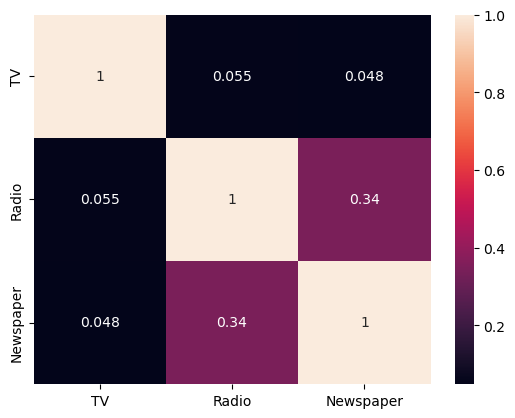

In [38]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [52]:
#no column is dropped all are retained for the model to learn on it

# Model buidling

In [41]:
# divide the data into input and target
x = data.drop('Sales',axis=1)
y = data['Sales']

In [40]:
# divide the x and y into training data and testing data
# 100 % data will be there

# training  maximumn data will be sent for model to train, 70%, 75%, 80%
# testing  minim data that is 20%, 25%,30 % will be sent for testing , new record for the model
        # it is a total unseen record for the model

In [42]:
#sklearn , it is a scientific library  which has all the functionalities of ML
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30, random_state = 3)

In [19]:
x.shape

(200, 3)

In [43]:
x_train.shape

(140, 3)

In [44]:
x_test.shape

(60, 3)

# Algorithm

In [45]:
# import the algorithm
from sklearn.linear_model import LinearRegression

#initialise it
model = LinearRegression()

#train the model
model.fit(x_train, y_train)

LinearRegression()

In [65]:
# we trained the model
# we need to test the model for the performance
# y_pred
# for tetsing the model, we need to send the model with unseen records, x_test

In [49]:
y_pred = model.predict(x_test)

In [48]:
y_test

40     16.6
51     10.7
139    20.7
197    12.8
170     8.4
82     11.3
183    26.2
46     10.6
70     18.3
100    11.7
179    12.6
83     13.6
25     12.0
190    10.8
159    12.9
173    11.7
95     16.9
3      18.5
41     17.1
58     23.8
14     19.0
143    10.4
12      9.2
6      11.8
182     8.7
161    13.3
128    24.7
122    11.6
101    23.8
86     12.0
64     18.0
47     23.2
158     7.3
34      9.5
38     10.1
196     9.7
4      12.9
72      8.8
67     13.4
145    10.3
156    15.3
115    12.6
155     3.2
15     22.4
61     24.2
175    27.0
120    15.5
130     1.6
23     15.5
153    19.0
31     11.9
103    14.7
89     16.7
132     5.7
109    19.8
126     6.6
17     24.4
30     21.4
178    11.8
162    14.9
Name: Sales, dtype: float64

In [47]:
y_pred

array([16.23866583,  9.60953755, 19.68137088, 12.83173286,  7.74400821,
       10.3918289 , 23.57574084,  9.04503761, 17.61296929, 13.62833907,
       12.41684738, 14.61653736, 15.3709655 , 12.88624082, 12.44932825,
       12.01757913, 16.19051982, 17.4737456 , 17.18797562, 21.68284171,
       18.22249297,  8.90460934, 10.78546901, 12.01522967,  6.84780057,
       13.6604905 , 22.1515455 , 13.51226396, 22.92864625, 11.8672777 ,
       17.02641123, 21.51130851, 10.70654069,  7.85121105, 10.19458347,
        8.43938167, 13.01574329, 10.7542018 , 12.16710471,  9.85395364,
       15.45046899, 13.03786292,  5.83473761, 20.58855813, 22.47473215,
       24.37221792, 14.37860644, 10.92277932, 16.36232327, 18.12905809,
       11.43374303, 14.72365347, 16.93551195,  8.96216107, 19.50558157,
       10.88679726, 22.75200786, 21.19100378, 15.71811589, 14.87529081])

In [50]:
# slopes # 3 slope values are given? 
# m1 x1 + m2 x2 + m3 x3 + C = y # since we have 3 input values 3 slopes#
model.coef_

array([ 0.04298258,  0.1874719 , -0.00501022])

In [51]:
#intercept
model.intercept_

3.512393260287631

In [52]:
#user defined values for the prediction
# TV 100 , Radio 70 Newspaper = 20
model.predict([[100,70,20]])

array([20.83347957])

In [28]:
# Erros / loss functions 
# Error = Actual - predicted value
# MSE
# MAE 
# RMSE
# takes 2 parameters y_test, y_pred

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
mse = mean_squared_error(y_test,y_pred)
mse

4.048113975015632

In [55]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.3788886620041025

In [56]:
rmse = np.sqrt(mse)
rmse

2.011992538508936

In [57]:
r2_score(y_test,y_pred)

0.8768045255102058

In [ ]:
# 87% is the r2 score
# this signifies, the over all perfomance of the model is good
# 87% of the records are predicted correctly
# 13% of data is predicted wrong